# Thermal Radiation

In [1]:
import matplotlib

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mono_em_power(temperature, wavelength=None):
    """
    Monochromatic emissive power
    Enclosure Fire Dynamics, B. Karlsson and J. G. Quintiere,
    2000 by CRC Press LLC, Formula 7.3
    
    :param temperature: thermodynamic temperature, in K
    :param wavelength: wave length, in µm
    :return: emissive power, in W/m2-µm
    """
    C1 = (3.743 * 10 ** 8)  # W*µm**4/m**2
    C2 = (1.4387 * 10 ** 4)  # µm * K
    wavelength = wavelength
    emissive_power = (C1 * wavelength ** -5) / (
                np.e ** (C2 / (wavelength * temperature)) - 1)
    
    return emissive_power

In [3]:
def wavelength_to_rgb(wavelength, gamma=0.8):
    ''' 
    taken from https://stackoverflow.com/questions/44959955/matplotlib-color-under-curve-based-on-spectral-color
    taken from http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
    This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    Additionally alpha value set to 0.5 outside range
    '''
    scale = 1#/1000
    
    wavelength = float(wavelength)
    if wavelength >= 380*scale and wavelength <= 750*scale:
        A = 1.
    else:
        A=0.5
    if wavelength < 380*scale:
        wavelength = 380.*scale
    if wavelength >750*scale:
        wavelength = 750.*scale
    if wavelength >= 380*scale and wavelength <= 440*scale:
        attenuation = 0.3 + 0.7 * (wavelength - 380*scale) / (440*scale - 380*scale)
        R = ((-(wavelength - 440*scale) / (440*scale - 380*scale)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440*scale and wavelength <= 490*scale:
        R = 0.0
        G = ((wavelength - 440*scale) / (490*scale - 440*scale)) ** gamma
        B = 1.0
    elif wavelength >= 490*scale and wavelength <= 510*scale:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510*scale) / (510*scale - 490*scale)) ** gamma
    elif wavelength >= 510*scale and wavelength <= 580*scale:
        R = ((wavelength - 510*scale) / (580*scale - 510*scale)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580*scale and wavelength <= 645*scale:
        R = 1.0
        G = (-(wavelength - 645*scale) / (645*scale - 580*scale)) ** gamma
        B = 0.0
    elif wavelength >= 645*scale and wavelength <= 750*scale:
        attenuation = 0.3 + 0.7 * (750*scale - wavelength) / (750*scale - 645*scale)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    return (R,G,B,A)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app


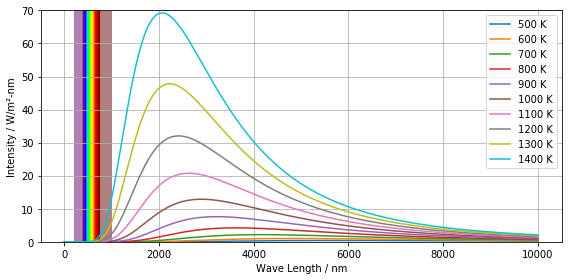

In [4]:


# Wave length band in µm.
wave_length_band = np.linspace(0,10,1000)
wavelengths = np.linspace(200, 1000, 1000)

temperatures = [#300, 400, 
                500, 600, #1000]
                700, 800, 900, 1000, 
                1100, 1200, 1300, 1400]




# Define the wave length for the visual spectrum in nm.
clim=(350,780)
# clim=(0.350,0.780)

# Scale the colors to the to the correct x-values (wave length).
norm = plt.Normalize(*clim)
wl = np.arange(clim[0],clim[1]+1,2)
# wl = np.arange(clim[0],clim[1]+0.001,0.002)
colorlist = list(zip(norm(wl),[wavelength_to_rgb(w) for w in wl]))
spectralmap = matplotlib.colors.LinearSegmentedColormap.from_list("spectrum", colorlist)


# Set up plot.
fig, axs = plt.subplots(1, 1, figsize=(8,4), 
                        tight_layout=True)

# wavelengths = np.linspace(200, 1000, 1000)
# wavelengths = wavelengths
# spectrum = (5 + np.sin(wavelengths*0.1)**2) * np.exp(-0.00002*(wavelengths-600)**2)
# plt.plot(wavelengths, spectrum, color='darkred')

# Create map to fill the background with the colour spectrum.
# y = np.linspace(0, 6, 100)
y = np.linspace(0, 70, 100)
X,Y = np.meshgrid(wavelengths, y)

extent=(np.min(wavelengths), 
        np.max(wavelengths), 
        np.min(y), np.max(y))

# Plot the colour spectrum.
plt.imshow(X, clim=clim,  extent=extent, 
           cmap=spectralmap, aspect='auto')


# Plot the emission curves based on radiator temperature.
for radiator_temp in temperatures[:]:
    em_powers = list()
    for wavelength in wave_length_band:
        em_power = mono_em_power(temperature=radiator_temp, 
                                 wavelength=wavelength)
        em_powers.append(em_power/1000)

    plt.plot(wave_length_band*1000, em_powers, 
             label="{} K".format(radiator_temp))


plt.xlabel('Wave Length / nm')
plt.ylabel('Intensity / W/m²-nm')
plt.xlim()

plt.grid()
plt.legend()

# plt.fill_between(wavelengths, spectrum, 8, color='w')
# plt.savefig('WavelengthColors.png', dpi=200)

# plt.show()